### Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import seaborn as sns
import json
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
import visualkeras
import matplotlib.pyplot as plt
import umap
from babyplots import Babyplot
import hdbscan
from helpers import truncate, allele_freq_1, allele_freq_2, allele_matrix, create_syn_data_monogeen, snp_counter

### Constants

In [2]:
N_SNPS = 10000 # Number of snps
N_HUMANS = 1000 # Number of humans
p_min = 0.1
p_max = 0.9

### Create allele_matrix

In [3]:
frequency_array1 = allele_freq_1(p_min, p_max, N_SNPS)
allele_matrix1 = allele_matrix(frequency_array1, N_SNPS)

### Population 1 

In [22]:
data_dict1 = create_syn_data_monogeen(N_HUMANS, allele_matrix1, "pop1")
"""
Saving Everything in a JSON file
"""
with open('../../Data/Inputs/Synthetisch/SYN_01', 'w') as fout:
    json.dump(data_dict1, fout)

In [5]:
data_dict1[0]

{'IID': '0pop1',
 'Pheno': 1,
 'Geno': [2,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  0,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  1,
  0,
  2,
  0,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  1,
  0,
  2,
  2,
  2,
  1,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  0,
  0,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  

In [6]:
df_pop1 = pd.DataFrame(data_dict1)
df_pop1

,IID,Pheno,Geno,State
0,0pop1,1,"[2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick
1,1pop1,1,"[2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick
2,2pop1,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, ...",pop1sick
3,3pop1,1,"[2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, ...",pop1sick
4,4pop1,1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...",pop1sick
...,...,...,...,...
995,995pop1,1,"[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, ...",pop1sick
996,996pop1,0,"[2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1healthy
997,997pop1,1,"[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick
998,998pop1,0,"[2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, ...",pop1healthy


###  Population 2

In [23]:
frequency_array2 = allele_freq_2(p_min, p_max, N_SNPS)
allele_matrix2 = allele_matrix(frequency_array2, N_SNPS)
data_dict2 = create_syn_data_monogeen(N_HUMANS, allele_matrix2, "pop2")
"""
Saving Everything in a JSON file
"""
with open('../../Data/Inputs/Synthetisch/SYN_02', 'w') as fout:
    json.dump(data_dict2, fout)

In [8]:
df_pop2 = pd.DataFrame(data_dict2)
df_pop2

,IID,Pheno,Geno,State
0,0pop2,1,"[0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, ...",pop2sick
1,1pop2,1,"[0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, ...",pop2sick
2,2pop2,0,"[0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, ...",pop2healthy
3,3pop2,0,"[0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, ...",pop2healthy
4,4pop2,0,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, ...",pop2healthy
...,...,...,...,...
995,995pop2,0,"[2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, ...",pop2healthy
996,996pop2,0,"[0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, ...",pop2healthy
997,997pop2,1,"[0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, ...",pop2sick
998,998pop2,0,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, ...",pop2healthy


### Population 1 + 2

In [9]:
df_pop_tot = pd.concat([df_pop1, df_pop2], axis=0, ignore_index=True)

In [24]:
split = df_pop_tot.to_json(orient="records")
data_dict_tot = json.loads(split)

with open('../../Data/Inputs/Synthetisch/SYN_1_and_2', 'w') as fout:
    json.dump(data_dict_tot, fout)

In [11]:
mask11 = df_pop1['Pheno'] == 0
df_healthy_1 = df_pop1[mask11]
mask12 = df_pop1['Pheno'] == 1
df_sick_1 = df_pop1[mask12]
df_healthy_1.reset_index(drop=True, inplace=True)
df_sick_1.reset_index(drop=True, inplace=True)

In [12]:
df_sick_1

,IID,Pheno,Geno,State
0,0pop1,1,"[2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick
1,1pop1,1,"[2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick
2,2pop1,1,"[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, ...",pop1sick
3,3pop1,1,"[2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, ...",pop1sick
4,4pop1,1,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...",pop1sick
...,...,...,...,...
811,993pop1,1,"[2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, ...",pop1sick
812,994pop1,1,"[2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, ...",pop1sick
813,995pop1,1,"[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, ...",pop1sick
814,997pop1,1,"[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1sick


In [13]:
df_healthy_1

,IID,Pheno,Geno,State
0,8pop1,0,"[2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1healthy
1,13pop1,0,"[2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...",pop1healthy
2,16pop1,0,"[2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, ...",pop1healthy
3,19pop1,0,"[2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, ...",pop1healthy
4,20pop1,0,"[2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, ...",pop1healthy
...,...,...,...,...
179,977pop1,0,"[2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, ...",pop1healthy
180,978pop1,0,"[0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1healthy
181,985pop1,0,"[2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, ...",pop1healthy
182,996pop1,0,"[2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",pop1healthy


In [14]:
mask21 = df_pop2['Pheno'] == 0
df_healthy_2 = df_pop2[mask21]
mask22 = df_pop2['Pheno'] == 1
df_sick_2 = df_pop2[mask22]
df_healthy_2.reset_index(drop=True, inplace=True)
df_sick_2.reset_index(drop=True, inplace=True)

In [15]:
df_sick_2

,IID,Pheno,Geno,State
0,0pop2,1,"[0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, ...",pop2sick
1,1pop2,1,"[0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, ...",pop2sick
2,10pop2,1,"[2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, ...",pop2sick
3,12pop2,1,"[0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, ...",pop2sick
4,15pop2,1,"[1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, ...",pop2sick
...,...,...,...,...
184,983pop2,1,"[2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, ...",pop2sick
185,986pop2,1,"[0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, ...",pop2sick
186,988pop2,1,"[0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, ...",pop2sick
187,989pop2,1,"[2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, ...",pop2sick


In [16]:
df_healthy_2

,IID,Pheno,Geno,State
0,2pop2,0,"[0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, ...",pop2healthy
1,3pop2,0,"[0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, ...",pop2healthy
2,4pop2,0,"[0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, ...",pop2healthy
3,5pop2,0,"[2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, ...",pop2healthy
4,6pop2,0,"[2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",pop2healthy
...,...,...,...,...
806,994pop2,0,"[0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, ...",pop2healthy
807,995pop2,0,"[2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, ...",pop2healthy
808,996pop2,0,"[0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, ...",pop2healthy
809,998pop2,0,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, ...",pop2healthy


###  Creating Plot Population 1 Sick

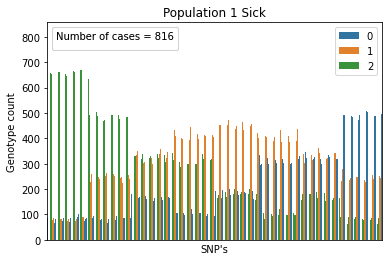

In [17]:
df_pop1_sick = snp_counter(df_sick_1)
sns.barplot(x = 'id',
            y = 'val',
            data = df_pop1_sick, ci = None,
            hue = 'genotype').set_title('Population 1 Sick');
plt.xlabel("SNP's");
plt.ylabel("Genotype count");
plt.xticks([], []);
legend1 = plt.legend(['0','1', '2'], loc=1);
legend2 = plt.legend([],title=f"Number of cases = {len(df_sick_1)}", loc=2);
plt.gca().add_artist(legend1);
plt.gca().add_artist(legend2);
plt.savefig('../../Plots/Synthetisch/syn_pop1_sick.png')

### Creating Plot Population 1 Healthy

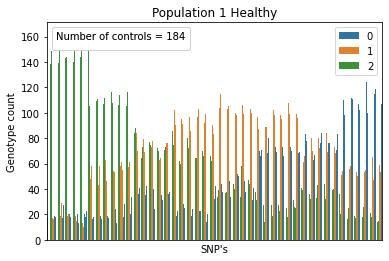

In [18]:
df_pop1_healthy = snp_counter(df_healthy_1)
sns.barplot(x = 'id',
            y = 'val',
            data = df_pop1_healthy, ci = None,
            hue = 'genotype').set_title('Population 1 Healthy');
plt.xlabel("SNP's");
plt.ylabel("Genotype count");
plt.xticks([], []);
legend1 = plt.legend(['0','1', '2'], loc=1);
legend2 = plt.legend([],title=f"Number of controls = {len(df_healthy_1)}", loc=2);
plt.gca().add_artist(legend1);
plt.gca().add_artist(legend2);
plt.savefig('../../Plots/Synthetisch/syn_pop1_healthy.png')

### Creating plots Population 2 Sick

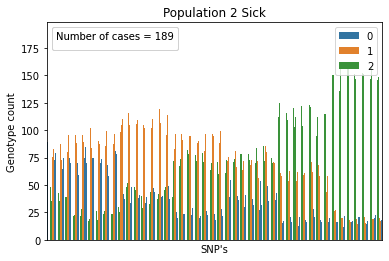

In [19]:
df_pop2_sick = snp_counter(df_sick_2)
sns.barplot(x = 'id',
            y = 'val',
            data = df_pop2_sick, ci = None,
            hue = 'genotype').set_title('Population 2 Sick');
plt.xlabel("SNP's");
plt.ylabel("Genotype count");
plt.xticks([], []);
legend1 = plt.legend(['0','1', '2'], loc=1);
legend2 = plt.legend([],title=f"Number of cases = {len(df_sick_2)}", loc=2);
plt.gca().add_artist(legend1);
plt.gca().add_artist(legend2);
plt.savefig('../../Plots/Synthetisch/syn_pop2_sick.png')

### Creating Plot Population 2 Healthy

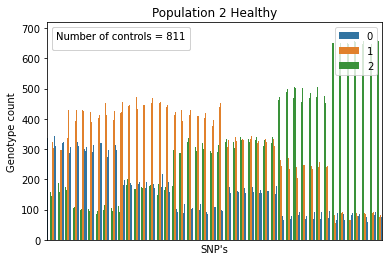

In [20]:
df_pop2_healthy = snp_counter(df_healthy_2)
sns.barplot(x = 'id',
            y = 'val',
            data = df_pop2_healthy, ci = None,
            hue = 'genotype').set_title('Population 2 Healthy');
plt.xlabel("SNP's");
plt.ylabel("Genotype count");
plt.xticks([], []);
legend1 = plt.legend(['0','1', '2'], loc=1);
legend2 = plt.legend([],title=f"Number of controls = {len(df_healthy_2)}", loc=2);
plt.gca().add_artist(legend1);
plt.gca().add_artist(legend2);
plt.savefig('../../Plots/Synthetisch/syn_pop2_healthy.png')

### Creating Plot of total Population

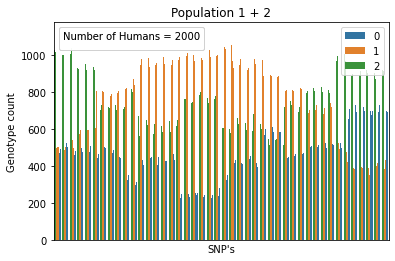

In [21]:
df_tot = snp_counter(df_pop_tot)
sns.barplot(x = 'id',
            y = 'val',
            data = df_tot, ci = None,
            hue = 'genotype').set_title('Population 1 + 2');
plt.xlabel("SNP's");
plt.ylabel("Genotype count");
plt.xticks([], []);
legend1 = plt.legend(['0','1', '2'], loc=1);
legend2 = plt.legend([],title=f"Number of Humans = {len(df_pop_tot)}", loc=2);
plt.gca().add_artist(legend1);
plt.gca().add_artist(legend2);
plt.savefig('../../Plots/Synthetisch/syn_pop_1_and_2.png')